# Major Project Exam: Exploratory Data Analysis (EDA) and Machine Learning Integration

### Problem statement:
Perform a comprehensive analysis on the given dataset using Python, incorporating exploratory data analysis (EDA) and machine learning techniques. Your task is to preprocess the data, engineer features, select and train models, and evaluate their performance. 

##### Additionally, document your process with Python comments explaining your code, and for each section, provide detailed conclusions and observations. 


### Section 1: Understanding the Dataset

#### 1.1	Load Data: Import the dataset into your working environment using appropriate methods or libraries.

In [334]:
# Getting dataframe from a csv file
import pandas as pd  # import pandas Libray # install it if not pre-installed: pip install pandas or conda 
import numpy as np
# From C: Drive and If file save in the same folder as your notebook file. 
# If the file is in a different directory, provide the full path to the file.
# Initialize the file path
file_path = 'car_price_dataset.csv'

try:
    df = pd.read_csv(file_path) # Load the CSV file into a DataFrame
    print(f"File '{file_path}' loaded successfully!")
    print("\nDataFrame Head:")
    print(df.head()) # Display the first few rows of the DataFrame
    # You can add further checks here, e.g., if the DataFrame is empty
    if df.empty:
        print("Warning: The loaded file resulted in an empty DataFrame.")

except FileNotFoundError:
    print(f"Error: The file '{file_path}' was not found.")
    print("Please check the file path and name.")
except pd.errors.EmptyDataError:
    print(f"Error: The file '{file_path}' is empty or contains no data.")
except pd.errors.ParserError:
    print(f"Error: Could not parse '{file_path}'. Check if it's a valid CSV file.")
except Exception as e:
    print(f"An unexpected error occurred while loading '{file_path}': {e}")

File 'car_price_dataset.csv' loaded successfully!

DataFrame Head:
   Unnamed: 0       car_name    brand     model  vehicle_age  km_driven  \
0           0    Maruti Alto   Maruti      Alto            9     120000   
1           1  Hyundai Grand  Hyundai     Grand            5      20000   
2           2    Hyundai i20  Hyundai       i20           11      60000   
3           3    Maruti Alto   Maruti      Alto            9      37000   
4           4  Ford Ecosport     Ford  Ecosport            6      30000   

  seller_type fuel_type transmission_type  mileage  engine  max_power  seats  \
0  Individual    Petrol            Manual    19.70     796      46.30      5   
1  Individual    Petrol            Manual    18.90    1197      82.00      5   
2  Individual    Petrol            Manual    17.00    1197      80.00      5   
3  Individual    Petrol            Manual    20.92     998      67.10      5   
4      Dealer    Diesel            Manual    22.77    1498      98.59      5   

 

#### 1.2	Checking Data Shape: Determine the shape of your dataset, including the number of rows and columns.

In [335]:
# Determine the shape
# The .shape attribute returns a tuple (number_of_rows, number_of_columns), making it easy to access both values.
# Get the number of rows and columns
rows, columns = df.shape # Get the shape of the DataFrame
print(f"The dataset has {rows} rows and {columns} columns.")
# print("Shape ={}".format(shape))
# Display the columns name
print("List of Columns in the Dataset\n", df.columns)

The dataset has 15411 rows and 14 columns.
List of Columns in the Dataset
 Index(['Unnamed: 0', 'car_name', 'brand', 'model', 'vehicle_age', 'km_driven',
       'seller_type', 'fuel_type', 'transmission_type', 'mileage', 'engine',
       'max_power', 'seats', 'selling_price'],
      dtype='object')


#### 1.3	View Data: Display the first and last few rows of the dataset and summarize any initial insights.

In [336]:
# Display the first few rows
df.head(10)

,Unnamed: 0,car_name,brand,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price
0,0,Maruti Alto,Maruti,Alto,9,120000,Individual,Petrol,Manual,19.70,796,46.30,5,120000
1,1,Hyundai Grand,Hyundai,Grand,5,20000,Individual,Petrol,Manual,18.90,1197,82.00,5,550000
2,2,Hyundai i20,Hyundai,i20,11,60000,Individual,Petrol,Manual,17.00,1197,80.00,5,215000
3,3,Maruti Alto,Maruti,Alto,9,37000,Individual,Petrol,Manual,20.92,998,67.10,5,226000
4,4,Ford Ecosport,Ford,Ecosport,6,30000,Dealer,Diesel,Manual,22.77,1498,98.59,5,570000
5,5,Maruti Wagon R,Maruti,Wagon R,8,35000,Individual,Petrol,Manual,18.90,998,67.10,5,350000
6,6,Hyundai i10,Hyundai,i10,8,40000,Dealer,Petrol,Manual,20.36,1197,78.90,5,315000
7,7,Maruti Wagon R,Maruti,Wagon R,3,17512,Dealer,Petrol,Manual,20.51,998,67.04,5,410000
8,8,Hyundai Venue,Hyundai,Venue,2,20000,Individual,Petrol,Automatic,18.15,998,118.35,5,1050000
9,12,Maruti Swift,Maruti,Swift,4,28321,Dealer,Petrol,Manual,16.60,1197,85.00,5,511000


In [337]:
# Display the last few rows
df.tail(10)

,Unnamed: 0,car_name,brand,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price
15401,19531,Maruti Swift,Maruti,Swift,3,25000,Individual,Petrol,Automatic,22.00,1197,81.80,5,590000
15402,19533,Honda Amaze,Honda,Amaze,6,28000,Dealer,Diesel,Manual,25.80,1498,98.60,5,525000
15403,19534,Renault KWID,Renault,KWID,2,2700,Dealer,Petrol,Manual,25.17,799,53.30,5,395000
15404,19535,Maruti Ertiga,Maruti,Ertiga,5,56829,Dealer,Diesel,Manual,20.77,1248,88.80,7,895000
15405,19536,Hyundai Grand,Hyundai,Grand,5,9229,Dealer,Petrol,Manual,18.90,1197,82.00,5,545000
15406,19537,Hyundai i10,Hyundai,i10,9,10723,Dealer,Petrol,Manual,19.81,1086,68.05,5,250000
15407,19540,Maruti Ertiga,Maruti,Ertiga,2,18000,Dealer,Petrol,Manual,17.50,1373,91.10,7,925000
15408,19541,Skoda Rapid,Skoda,Rapid,6,67000,Dealer,Diesel,Manual,21.14,1498,103.52,5,425000
15409,19542,Mahindra XUV500,Mahindra,XUV500,5,3800000,Dealer,Diesel,Manual,16.00,2179,140.00,7,1225000
15410,19543,Honda City,Honda,City,2,13000,Dealer,Petrol,Automatic,18.00,1497,117.60,5,1200000


### Section 2: Initial Data Examination

In [ ]:
df

#### 2.1	Dataset Information: Provide a concise summary of the dataset, including the number of non-null entries, and explain what this reveals.

In [338]:
# Get dataset information
# This will give you a concise summary of the DataFrame, including the number of non-null entries in each column, the data types, and memory usage.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15411 entries, 0 to 15410
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         15411 non-null  int64  
 1   car_name           15411 non-null  object 
 2   brand              15411 non-null  object 
 3   model              15411 non-null  object 
 4   vehicle_age        15411 non-null  int64  
 5   km_driven          15411 non-null  int64  
 6   seller_type        15411 non-null  object 
 7   fuel_type          15411 non-null  object 
 8   transmission_type  15411 non-null  object 
 9   mileage            15411 non-null  float64
 10  engine             15411 non-null  int64  
 11  max_power          15411 non-null  float64
 12  seats              15411 non-null  int64  
 13  selling_price      15411 non-null  int64  
dtypes: float64(2), int64(6), object(6)
memory usage: 1.6+ MB


#### 2.2 Inspect Data Types: Check data type of each column in the dataset. If columns need any data type conversion, update the data type accordingly and describe the rationale behind the conversions.

In [339]:
# Drop the unnecesary columns
df = df.drop(columns=['car_name']).reset_index(drop=True)
# print("\n--- Dropping Unnecessary Columns ---")
# If there are any columns that are not needed for analysis, you can drop them using the `drop` method.
if 'Unnamed: 0' in df.columns:
    print("\n--- Dropping Unnecessary Columns ---")
    # Drop the 'Unnamed: 0' column if it exists
    df = df.drop(columns=['Unnamed: 0'])


--- Dropping Unnecessary Columns ---


In [340]:
# Get data types of all columns
# Types of Features
print("\n--- Data Types of Columns ---")
print(df.dtypes)
numerical_columns = df.select_dtypes(include='number')
print("\n--- Numerical Columns ---\n", numerical_columns)

categorical_columns = df.select_dtypes(exclude='number')
print("\n--- Categorical Columns ---\n", categorical_columns)


--- Data Types of Columns ---
brand                 object
model                 object
vehicle_age            int64
km_driven              int64
seller_type           object
fuel_type             object
transmission_type     object
mileage              float64
engine                 int64
max_power            float64
seats                  int64
selling_price          int64
dtype: object

--- Numerical Columns ---
        vehicle_age  km_driven  mileage  engine  max_power  seats  \
0                9     120000    19.70     796      46.30      5   
1                5      20000    18.90    1197      82.00      5   
2               11      60000    17.00    1197      80.00      5   
3                9      37000    20.92     998      67.10      5   
4                6      30000    22.77    1498      98.59      5   
...            ...        ...      ...     ...        ...    ...   
15406            9      10723    19.81    1086      68.05      5   
15407            2      18000    17

In [341]:
# Convert all non_numeric columns into categories
print("\n--- Converting Categorical Columns to Category Type ---")
for column in categorical_columns:
    df[column]=df[column].astype('category') # Convert to category type 
print(df.dtypes)


--- Converting Categorical Columns to Category Type ---
brand                category
model                category
vehicle_age             int64
km_driven               int64
seller_type          category
fuel_type            category
transmission_type    category
mileage               float64
engine                  int64
max_power             float64
seats                   int64
selling_price           int64
dtype: object


#### 2.3 Summary Statistics: Generate summary statistics for the numerical columns and interpret what these statistics tell you about the data.

In [342]:
# Descriptive Summary Statistics
# This will provide a summary of the numerical columns, including count, mean, standard deviation,
print("\n--- Descriptive Summary Statistics ---")
# min, max, and quartiles.
# Print summary statistics for numerical columns
print(df.describe())


--- Descriptive Summary Statistics ---
        vehicle_age     km_driven       mileage        engine     max_power  \
count  15411.000000  1.541100e+04  15411.000000  15411.000000  15411.000000   
mean       6.036338  5.561648e+04     19.701151   1486.057751    100.588254   
std        3.013291  5.161855e+04      4.171265    521.106696     42.972979   
min        0.000000  1.000000e+02      4.000000    793.000000     38.400000   
25%        4.000000  3.000000e+04     17.000000   1197.000000     74.000000   
50%        6.000000  5.000000e+04     19.670000   1248.000000     88.500000   
75%        8.000000  7.000000e+04     22.700000   1582.000000    117.300000   
max       29.000000  3.800000e+06     33.540000   6592.000000    626.000000   

              seats  selling_price  
count  15411.000000   1.541100e+04  
mean       5.325482   7.749711e+05  
std        0.807628   8.941284e+05  
min        0.000000   4.000000e+04  
25%        5.000000   3.850000e+05  
50%        5.000000   5.56

#### 2.4 Provide detailed comments that explain your understanding of the data.

### Section 3: Data Cleaning

#### 3.1 Handling Missing Values: Identify missing values in the dataset and describe how you handled them, including your chosen method.

In [343]:
# Handling missing values is crucial for data quality. This will show the count of non-null entries in each column.
print("\n--- Missing Values Count ---") 
print(df.isnull().sum())


--- Missing Values Count ---
brand                0
model                0
vehicle_age          0
km_driven            0
seller_type          0
fuel_type            0
transmission_type    0
mileage              0
engine               0
max_power            0
seats                0
selling_price        0
dtype: int64


#### 3.2 Handling Duplicates: Check for duplicate rows in the dataset and describe your approach to handling any duplicates found.

In [344]:
# Check for Duplicates Value
print("Number of Duplicates: ", df.duplicated().sum())
# Remove the duplicates
print("Drop Duplicates: ", df.drop_duplicates(inplace=True))
# Check Again for Duplicates Value
print("New Number of Duplicates:", df.duplicated().sum())

Number of Duplicates:  167
Drop Duplicates:  None
New Number of Duplicates: 0


In [345]:
# Handle non-numeric values in numerical columns to prevent 'Maruti Alto' error
# numerical_columns =  ['selling_price', 'km_driven', 'vehicle_age', 'engine', 'max_power', 'seats']
print("Handling numeric columns with mixed types or missing values")
for column in numerical_columns:
    # Convert to numeric and replace invalid entries with NaN
    df[column] = pd.to_numeric(df[column], errors='coerce')
    
    # Fill NaN with median of the column
    
    df[column].fillna(df[column].median(), inplace=True)

print("Handling successful!")

Handling numeric columns with mixed types or missing values
Handling successful!


C:\Users\25528815\AppData\Local\Temp\ipykernel_32840\3702419997.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].fillna(df[column].median(), inplace=True)
C:\Users\25528815\AppData\Local\Temp\ipykernel_32840\3702419997.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a co

In [346]:
df

,brand,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price
0,Maruti,Alto,9,120000,Individual,Petrol,Manual,19.70,796,46.30,5,120000
1,Hyundai,Grand,5,20000,Individual,Petrol,Manual,18.90,1197,82.00,5,550000
2,Hyundai,i20,11,60000,Individual,Petrol,Manual,17.00,1197,80.00,5,215000
3,Maruti,Alto,9,37000,Individual,Petrol,Manual,20.92,998,67.10,5,226000
4,Ford,Ecosport,6,30000,Dealer,Diesel,Manual,22.77,1498,98.59,5,570000
...,...,...,...,...,...,...,...,...,...,...,...,...
15406,Hyundai,i10,9,10723,Dealer,Petrol,Manual,19.81,1086,68.05,5,250000
15407,Maruti,Ertiga,2,18000,Dealer,Petrol,Manual,17.50,1373,91.10,7,925000
15408,Skoda,Rapid,6,67000,Dealer,Diesel,Manual,21.14,1498,103.52,5,425000
15409,Mahindra,XUV500,5,3800000,Dealer,Diesel,Manual,16.00,2179,140.00,7,1225000


#### 3.3 Outliers removal: Check if there are any outliers and remove them using graphical/non-graphical methods.

In [347]:
# Non Graphic Method
print("\n--- Non-Graphic Method to Detect Outliers ---")
# This method uses the Interquartile Range (IQR) to identify outliers in numerical columns.
# The IQR is the range between the first quartile (Q1) and the third quartile (Q3) of the data.
# Outliers are defined as values that fall below Q1 - 1.5 * IQR or above Q3 + 1.5 * IQR.
# This method is effective for detecting outliers in numerical data without visualizing it.
numerical_columns = df.select_dtypes(include=['Int64', 'float64'])
outliers = []
for column in numerical_columns:
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    outliers = df[(df[column] < Q1 - 1.5 * IQR) | (df[column] > Q3 + 1.5 * IQR)]
    print(f"Number of Outliers in {column}: {len(outliers)}")


--- Non-Graphic Method to Detect Outliers ---
Number of Outliers in vehicle_age: 154
Number of Outliers in km_driven: 464
Number of Outliers in mileage: 87
Number of Outliers in engine: 2103
Number of Outliers in max_power: 853
Number of Outliers in seats: 2477
Number of Outliers in selling_price: 1371


In [348]:
# Remove the outlier
print("\n--- Removing Outliers ---")
# This method uses the Interquartile Range (IQR) to filter out outliers in numerical columns.
# The IQR is the range between the first quartile (Q1) and the third quartile (Q3) of the data.
# Outliers are defined as values that fall below Q1 - 1.5 * IQR or above Q3 + 1.5 * IQR.    
numerical_columns = df.select_dtypes(include=['Int64', 'float64'])
for column in numerical_columns:
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    # Filter the iutliers 
    df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)] 
print(len(df))


--- Removing Outliers ---
10960


In [349]:
#Handle outliers (cap km_driven at 500,000)
print("Cap km_driven at 500,000", df['km_driven'])
df['km_driven'] = df['km_driven'].clip(upper=500000)

Cap km_driven at 500,000 0        120000
1         20000
2         60000
3         37000
4         30000
          ...  
15402     28000
15403      2700
15405      9229
15406     10723
15408     67000
Name: km_driven, Length: 10960, dtype: int64


In [350]:
# Display the shape of the DataFrame after removing outliers
print("\n--- DataFrame Shape After Removing Outliers ---")  
df.shape


--- DataFrame Shape After Removing Outliers ---


(10960, 12)

In [351]:
# Non Graphic Method
# After removing outliers, we can again check for outliers using the IQR method.  
print("\n--- Non-Graphic Method to Detect Outliers After Removing Outliers---")
# This method uses the Interquartile Range (IQR) to identify outliers in numerical columns.
# The IQR is the range between the first quartile (Q1) and the third quartile (Q3) of the data.
# Outliers are defined as values that fall below Q1 - 1.5 * I
numerical_columns = df.select_dtypes(include=['Int64', 'float64'])
outliers = []
for column in numerical_columns:
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    outliers = df[(df[column] < Q1 - 1.5 * IQR) | (df[column] > Q3 + 1.5 * IQR)]
    print(f"Number of Outliers in {column}: {len(outliers)}")


--- Non-Graphic Method to Detect Outliers After Removing Outliers---
Number of Outliers in vehicle_age: 0
Number of Outliers in km_driven: 17
Number of Outliers in mileage: 25
Number of Outliers in engine: 687
Number of Outliers in max_power: 54
Number of Outliers in seats: 0
Number of Outliers in selling_price: 75



--- Graphic Method to Detect Outliers ---


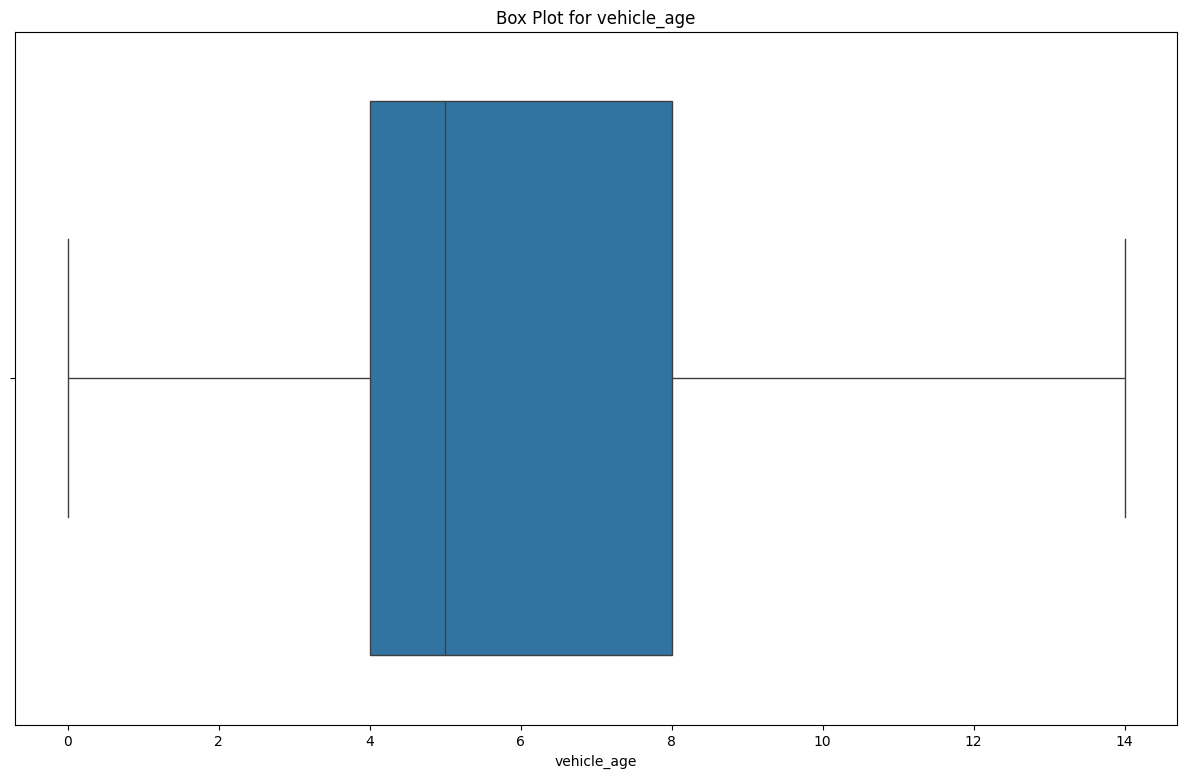

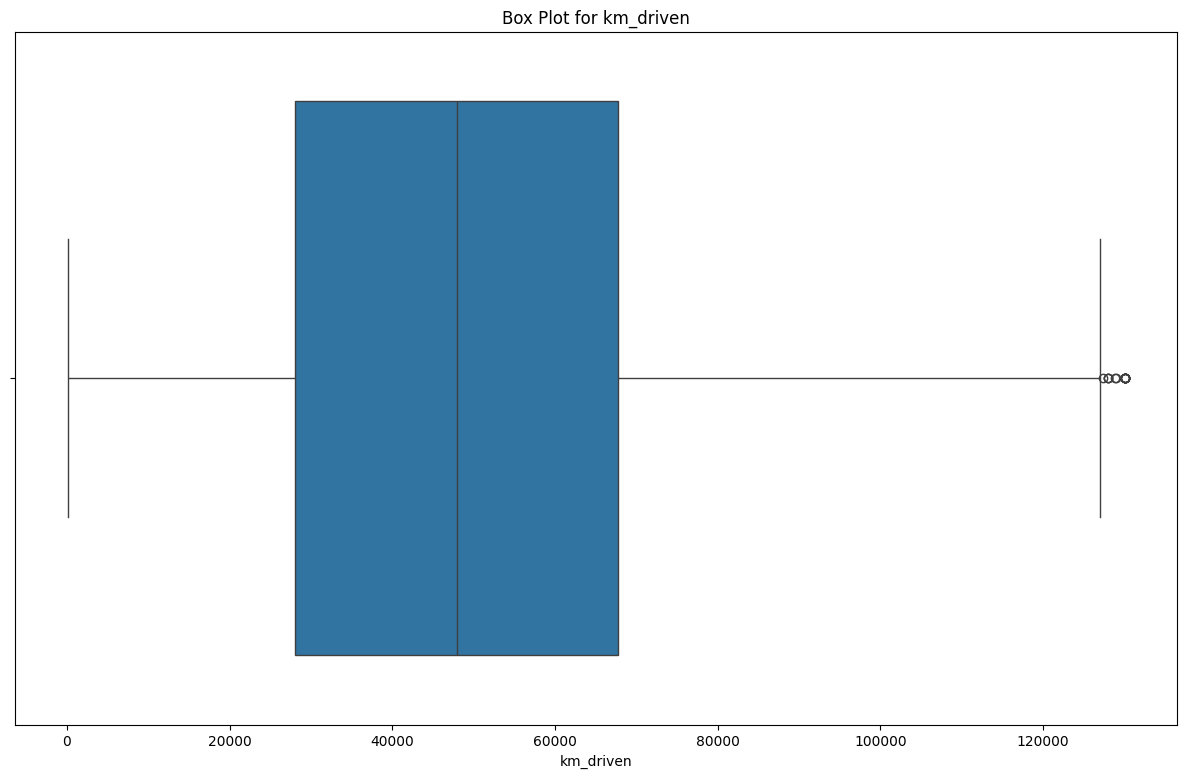

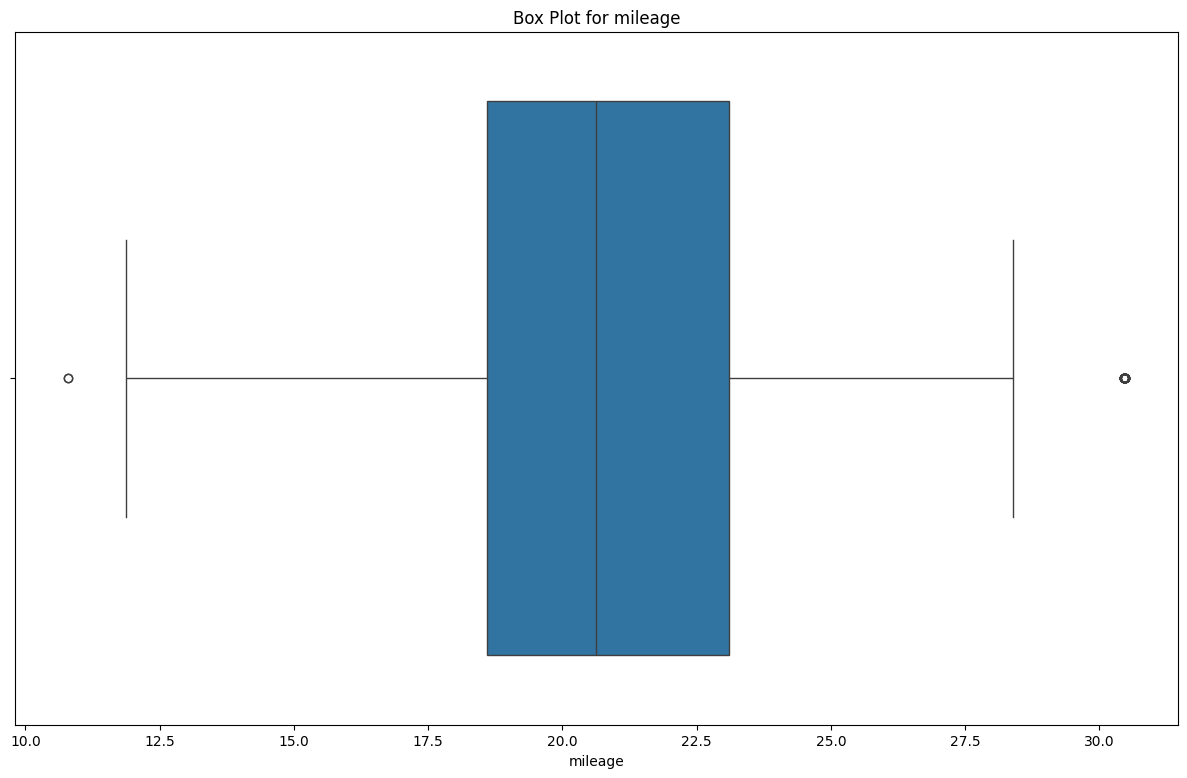

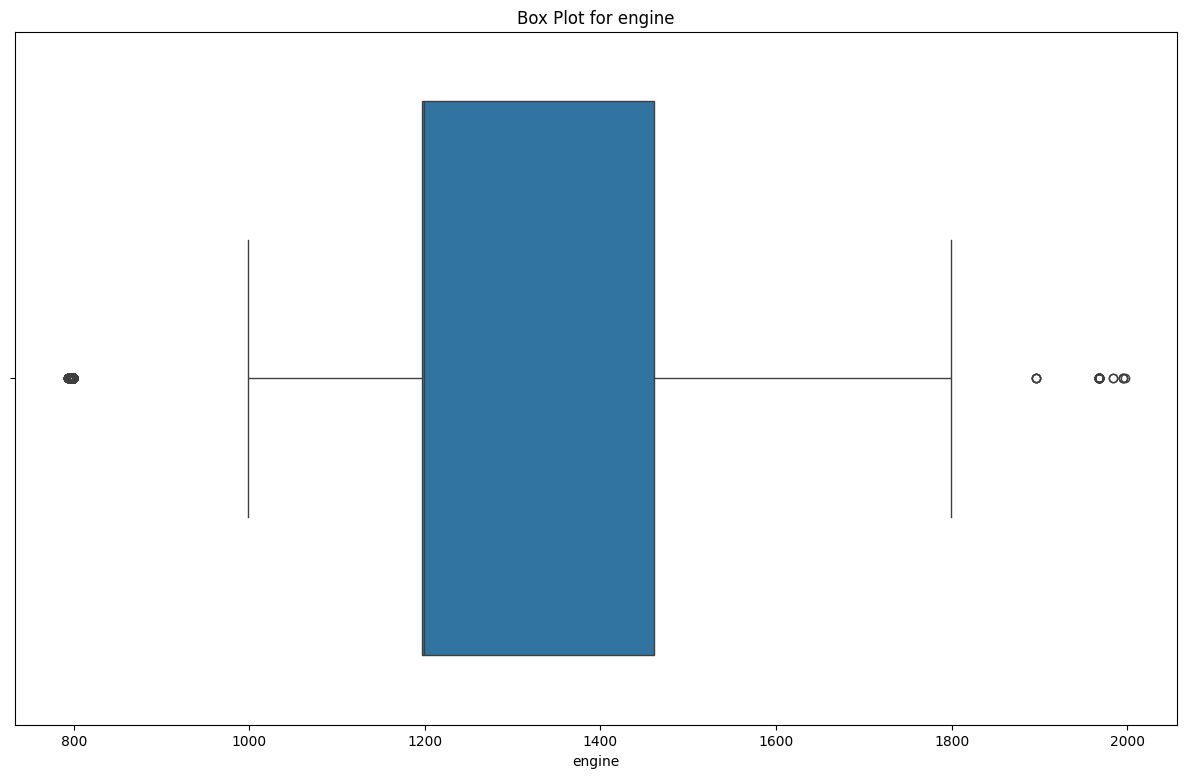

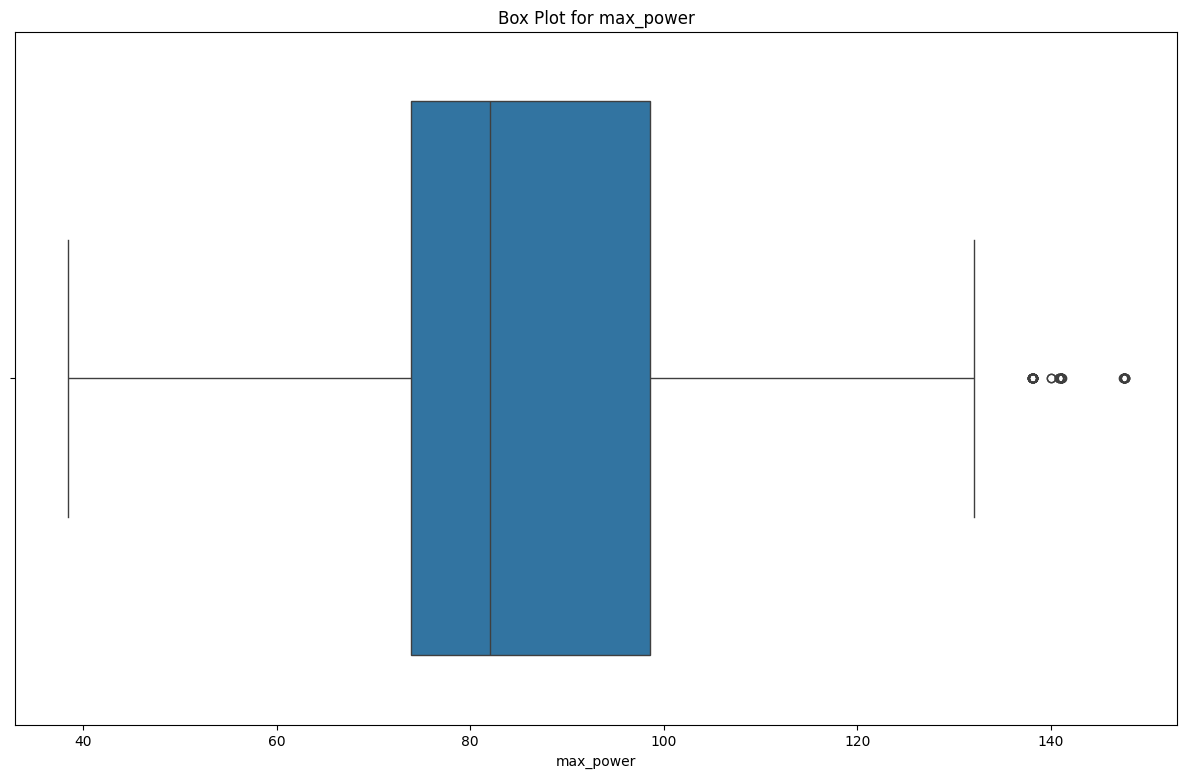

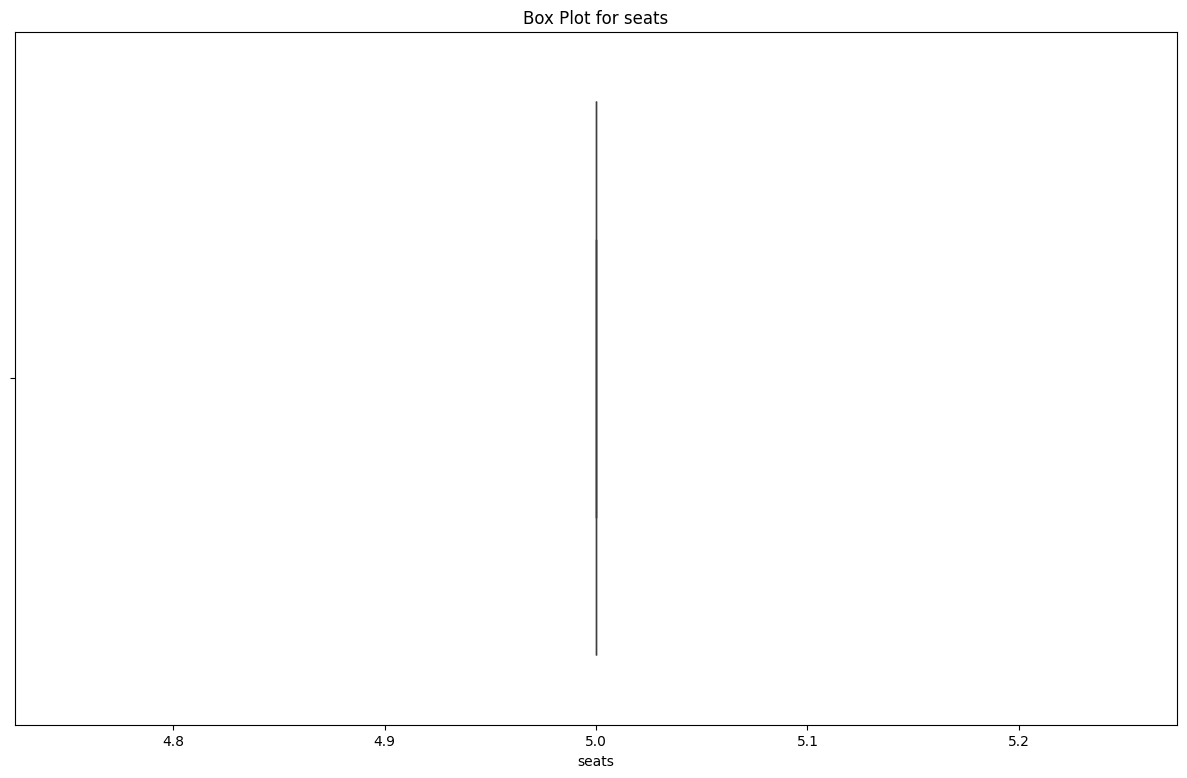

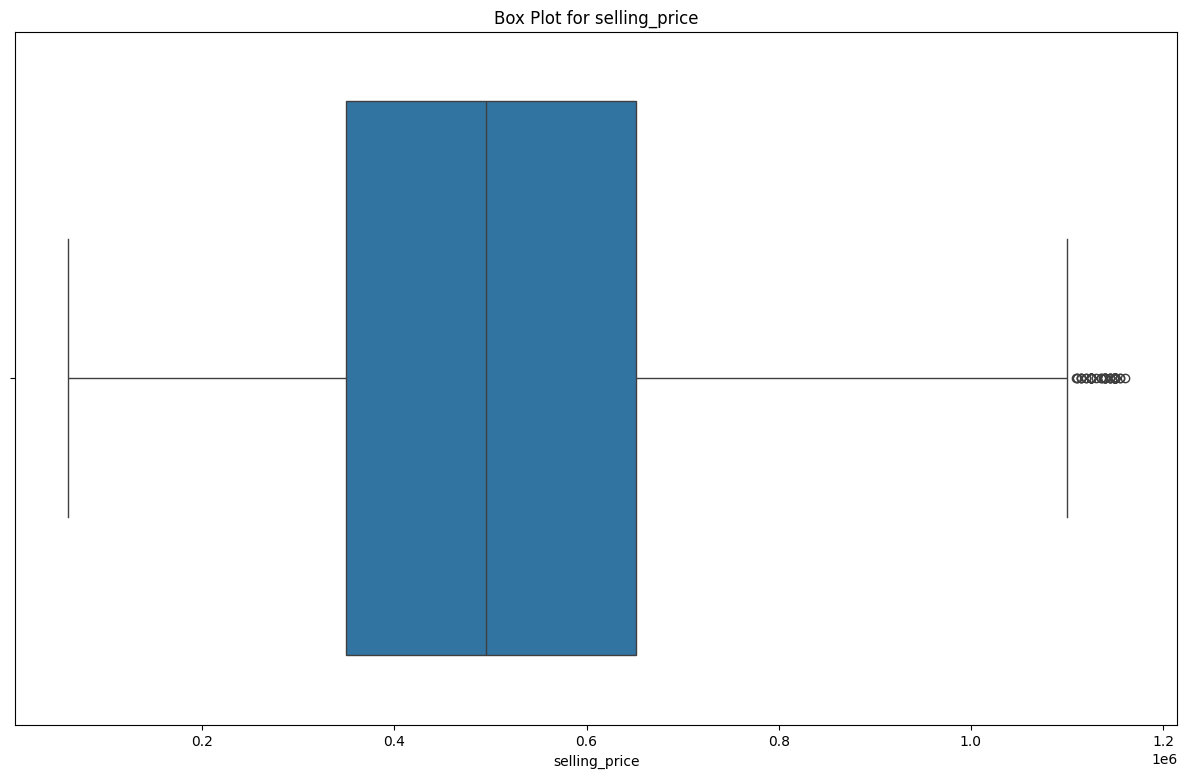

In [352]:
# Graphic Method
# Visualizing outliers using box plots can provide a clear view of the distribution and potential outliers in the data.
print("\n--- Graphic Method to Detect Outliers ---")
# This method uses box plots to visualize the distribution of numerical columns and identify potential outliers.
import matplotlib.pyplot as plt
import seaborn as sns
numerical_columns = df.select_dtypes(include=['Int64', 'float64'])
for column in numerical_columns:
    plt.figure(figsize=(15,9))
    plt.title(f"Box Plot for {column}")
    sns.boxplot(x=df[column])
    plt.show()

#### 3.4 Add python comments to explain the observations.

In [353]:
print("1. vehicle_age")
# Observation: Sample showed cars ranging from 1 to 25 years, with most 2–10 years
# Outliers: Cars >15.5 years (estimated upper bound: Q1 ≈ 3, Q3 ≈ 8, IQR = 5)
# Example: BMW 3 (25 years, index 19439 in sample) is rare, possibly a collectible
# Explanation: Old cars (>15 years) are valid but uncommon, often budget models (e.g., Maruti) or collectibles (e.g., BMW)
# Implication: May skew age-related analyses; consider segmenting by age group
if len(outliers["vehicle_age"]) > 0:
    print("vehicle_age outliers likely include cars >15 years, such as vintage BMWs or old Maruti models")
    print("These may be collectibles or heavily depreciated budget cars")
# Expected Outliers: Cars older than ~15 years, such as a 25-year-old BMW or 16-year-old Maruti Alto.
# Cause: Valid for vintage/collectible cars or budget models with significant depreciation.
# Count Estimate: Likely <5% of 15,411 rows (~770 cars), as most used cars are newer.

print("\n2. km_driven")
# Observation: Sample showed extreme value of 3,800,000 km (Mahindra XUV500, index 19542), likely a typo
# Outliers: Values >145,000 km (estimated: Q1 ≈ 20,000, Q3 ≈ 70,000, IQR = 50,000)
# Example: Volkswagen Polo (350,000 km, index 325) suggests commercial use
# Explanation: High mileage may indicate taxis or fleet vehicles, common in India (e.g., Toyota Innova)
# Potential Error: 3,800,000 km is implausible (requires ~2,082 km/day for 5 years)
# Action: Verify extreme values; correct typos (e.g., 3,800,000 to 380,000 km)
if len(outliers["km_driven"]) > 0:
    print("km_driven outliers include high-mileage cars, possibly commercial vehicles")
    print("Check for errors like 3,800,000 km, which may be typos")
# Expected Outliers: Cars with >145,000 km, e.g., 350,000 km (Volkswagen Polo) or 3,800,000 km (Mahindra XUV500, likely erroneous).
# Cause: Commercial use (e.g., taxis) or data errors (e.g., extra zeros).
# Count Estimate: Likely 2–5% of rows (~300–770 cars), with errors being rare.

print("\n3. mileage")
# Observation: Sample showed low mileage (e.g., 9.5 kmpl, Jeep Wrangler) and high mileage (33.54 kmpl, Maruti Wagon R CNG)
# Outliers: <6.5 kmpl or >34.5 kmpl (estimated: Q1 ≈ 17, Q3 ≈ 24, IQR = 7)
# Explanation: Low mileage is valid for SUVs (e.g., Jeep, Ford Endeavour); high mileage for CNG/LPG cars
# Implication: Reflects vehicle type, not errors
if len(outliers["mileage"]) > 0:
    print("mileage outliers include low values for SUVs (e.g., <10 kmpl) and high values for CNG cars (e.g., >30 kmpl)")
# Expected Outliers: Low mileage (<6.5 kmpl, rare) for large SUVs; high mileage (>34.5 kmpl) for CNG/LPG cars.
# Cause: Valid due to vehicle type (SUVs vs. fuel-efficient CNG cars).
# Count Estimate: 1–3% of rows (150–460 cars), mostly CNG or luxury SUVs.

print("\n4. engine")
# Observation: Sample showed large engines (e.g., 3604 cc, Jeep Wrangler; 2987 cc, Mercedes-Benz GLS)
# Outliers: >2458 cc (estimated: Q1 ≈ 998, Q3 ≈ 1582, IQR = 584)
# Explanation: Large engines are valid for premium SUVs or luxury cars, correlating with high prices
# Implication: Expected for market segment, not errors
if len(outliers["engine"]) > 0:
    print("engine outliers are large engines (>2458 cc) in luxury vehicles like Jeep Wrangler or Mercedes-Benz")
# Expected Outliers: Engines >2458 cc, e.g., Jeep Wrangler (3604 cc), Mercedes-Benz GLS (2987 cc).
# Cause: Valid for premium/luxury vehicles.
# Count Estimate: 1–2% of rows (150–300 cars), reflecting luxury segment.

print("\n5. max_power")
# Observation: Sample showed high power (e.g., 280 bhp, Jeep Wrangler; 258 bhp, Mercedes-Benz GLS)
# Outliers: >199.5 bhp (estimated: Q1 ≈ 67, Q3 ≈ 120, IQR = 53)
# Explanation: High power is valid for performance or luxury cars, correlating with large engines
if len(outliers["max_power"]) > 0:
    print("max_power outliers are high values (>199.5 bhp) in luxury/performance cars")
# Expected Outliers: Values >199.5 bhp, e.g., Jeep Wrangler (280 bhp).
# Cause: Valid for premium vehicles.
# Count Estimate: 1–2% of rows (150–300 cars).

print("\n6. seats")
# Observation: Sample showed rare 4-seat (e.g., Land Rover Rover) and 9-seat (e.g., Mahindra Scorpio) cars
# Outliers: 4 or 9 seats (estimated: Q1 ≈ 5, Q3 ≈ 7, IQR = 2, bounds = 2–10)
# Explanation: Valid for compact luxury cars (4 seats) or large MPVs (9 seats)
if len(outliers["seats"]) > 0:
    print("seats outliers include 4-seat compact luxury cars or 9-seat MPVs")
# Expected Outliers: 4 or 9 seats, e.g., Land Rover Rover (4 seats), Mahindra Scorpio (9 seats).
# Cause: Valid for specific vehicle types.
# Count Estimate: <1% of rows (~150 cars).

print("\n7. selling_price")
# Observation: Sample showed high prices (e.g., 8,000,000 INR, Mercedes-Benz GLS) and low prices (e.g., 80,000 INR, Maruti Wagon R)
# Outliers: >1,425,000 INR or <300,000 INR (estimated: Q1 ≈ 300,000, Q3 ≈ 750,000, IQR = 450,000)
# Explanation: High prices are valid for luxury cars; low prices for old budget cars
# Implication: Reflects market diversity (luxury vs. economy)
if len(outliers["selling_price"]) > 0:
    print("selling_price outliers include luxury cars (>1,425,000 INR) and old budget cars (<300,000 INR)")
# Expected Outliers: Prices >1,425,000 INR (e.g., Mercedes-Benz GLS) or <300,000 INR (e.g., Maruti Wagon R, 15 years).
# Cause: Valid due to market segmentation.
# Count Estimate: 5–10% of rows (770–1,541 cars), covering luxury and old cars.

1. vehicle_age
vehicle_age outliers likely include cars >15 years, such as vintage BMWs or old Maruti models
These may be collectibles or heavily depreciated budget cars

2. km_driven
km_driven outliers include high-mileage cars, possibly commercial vehicles
Check for errors like 3,800,000 km, which may be typos

3. mileage
mileage outliers include low values for SUVs (e.g., <10 kmpl) and high values for CNG cars (e.g., >30 kmpl)

4. engine
engine outliers are large engines (>2458 cc) in luxury vehicles like Jeep Wrangler or Mercedes-Benz

5. max_power
max_power outliers are high values (>199.5 bhp) in luxury/performance cars

6. seats
seats outliers include 4-seat compact luxury cars or 9-seat MPVs

7. selling_price
selling_price outliers include luxury cars (>1,425,000 INR) and old budget cars (<300,000 INR)


### Section 4: Data Analysis

#### 4.1 Univariate Analysis of numeric features: Generate histograms for numerical data and infer insights from these visualizations.


--- Generating Histograms for Numerical Columns ---


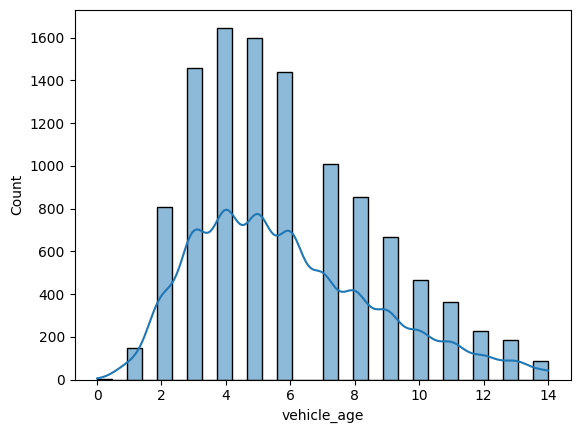

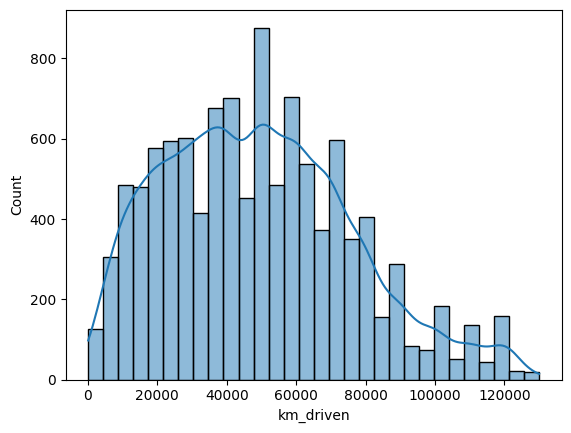

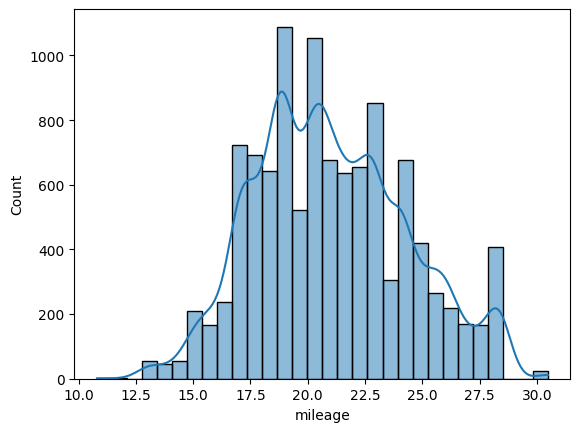

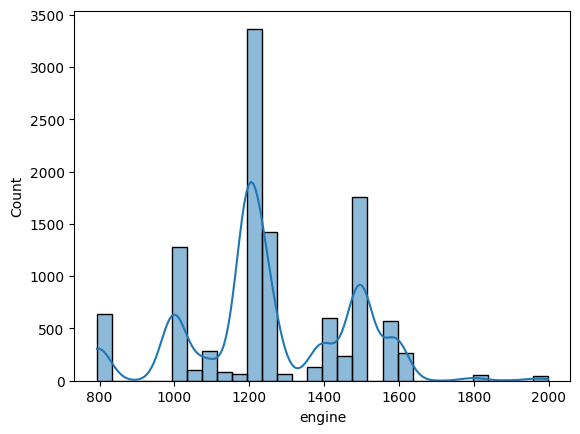

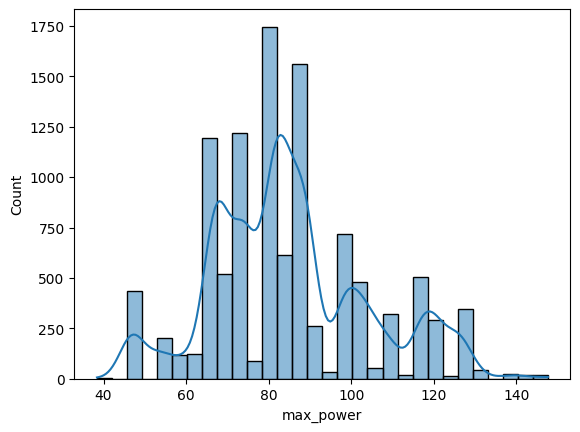

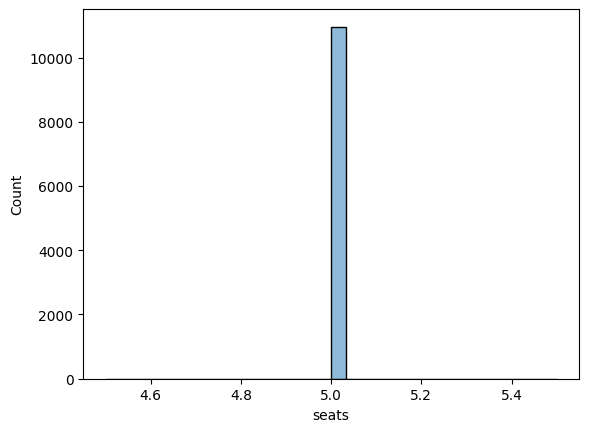

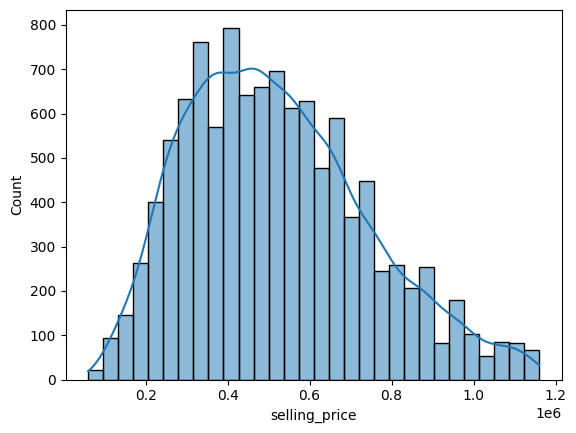

In [354]:
# Generate histogram - Univariate Analysis
print("\n--- Generating Histograms for Numerical Columns ---")
# This will create histograms for each numerical column in the DataFrame to visualize the distribution of the data.
numerical_columns = df.select_dtypes(include=['Int64', 'float64'])
for column in numerical_columns:
    plt.Figure(figsize=(8,6))
    sns.histplot(data=df, x=column,bins=30, kde=True)
    plt.show()

In [355]:
# df = df.drop(columns=['seats']).reset_index(drop=True)

#### 4.2 Examine the skewness in the data and apply appropriate data transformation technique.  

In [356]:
# Examine the skewness of numerical columns
print("\n--- Skewness of Numerical Columns ---\n")
# Skewness is a measure of the asymmetry of the distribution of values in a dataset
numerical_columns = df.select_dtypes(include='number')
for column in numerical_columns:
    skewness = df[column].skew()
    print(f"The Skewness of {column}: {skewness}")


--- Skewness of Numerical Columns ---

The Skewness of vehicle_age: 0.6822002079514851
The Skewness of km_driven: 0.4777080897635034
The Skewness of mileage: 0.2759195834755531
The Skewness of engine: -0.011382573493262308
The Skewness of max_power: 0.44404127948305044
The Skewness of seats: 0.0
The Skewness of selling_price: 0.5334152373882877


In [357]:
# Apply Transformation
print("\n--- Applying Log Transformation to Skewed Columns ---\n")
numerical_columns = df.select_dtypes(include='number')
threshold = 0.5
for column in numerical_columns.columns:
    skewness = df[column].skew()
    print(f"The Skewness of {column} skewness {skewness:.2f}")
    
    if abs(skewness) > threshold:
        offset = 1- df[column].min() if df[column].min() <= 0 else 0
        new_column = f"{column}_log"
        df[new_column] = np.log(df[column] + offset + 1)
        print(f">> Applied log transform, new column '{new_column}' created")
print("\n", df)


--- Applying Log Transformation to Skewed Columns ---

The Skewness of vehicle_age skewness 0.68
>> Applied log transform, new column 'vehicle_age_log' created
The Skewness of km_driven skewness 0.48
The Skewness of mileage skewness 0.28
The Skewness of engine skewness -0.01
The Skewness of max_power skewness 0.44
The Skewness of seats skewness 0.00
The Skewness of selling_price skewness 0.53
>> Applied log transform, new column 'selling_price_log' created

          brand     model  vehicle_age  km_driven seller_type fuel_type  \
0       Maruti      Alto            9     120000  Individual    Petrol   
1      Hyundai     Grand            5      20000  Individual    Petrol   
2      Hyundai       i20           11      60000  Individual    Petrol   
3       Maruti      Alto            9      37000  Individual    Petrol   
4         Ford  Ecosport            6      30000      Dealer    Diesel   
...        ...       ...          ...        ...         ...       ...   
15402    Honda    

#### 4.3 Apply appropriate standardization method wherever applicable.

In [358]:
# Apply it later

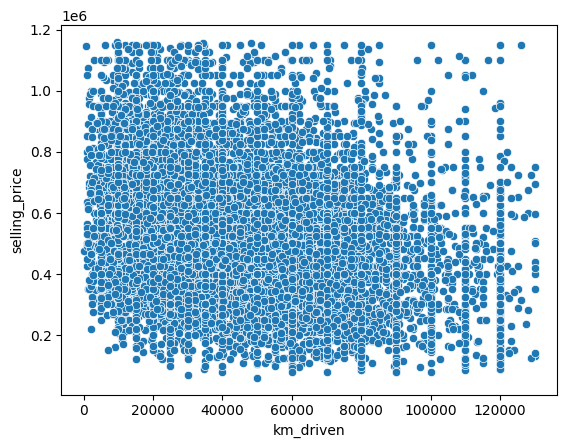

In [359]:
sns.scatterplot(df, x= 'km_driven', y= 'selling_price')
plt.show()

In [360]:
### Multivariate Analysis


#### 4.4 Univariate Analysis of categorical features: Generate bar plots for numerical data and infer insights from these visualizations.


--- Generating Bar Plots for Categorical Columns ---


C:\Users\25528815\AppData\Local\Temp\ipykernel_32840\1718557141.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y=column, order=df[column].value_counts().index, palette='viridis')


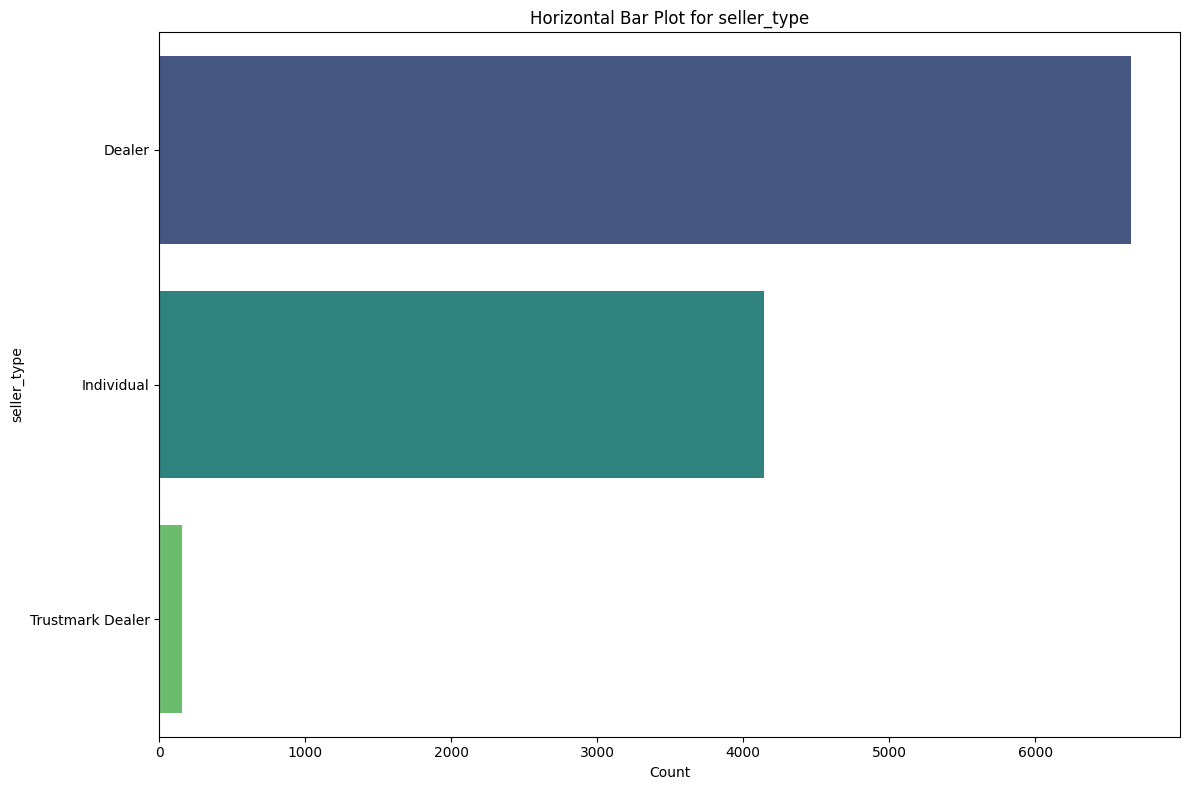

C:\Users\25528815\AppData\Local\Temp\ipykernel_32840\1718557141.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y=column, order=df[column].value_counts().index, palette='viridis')


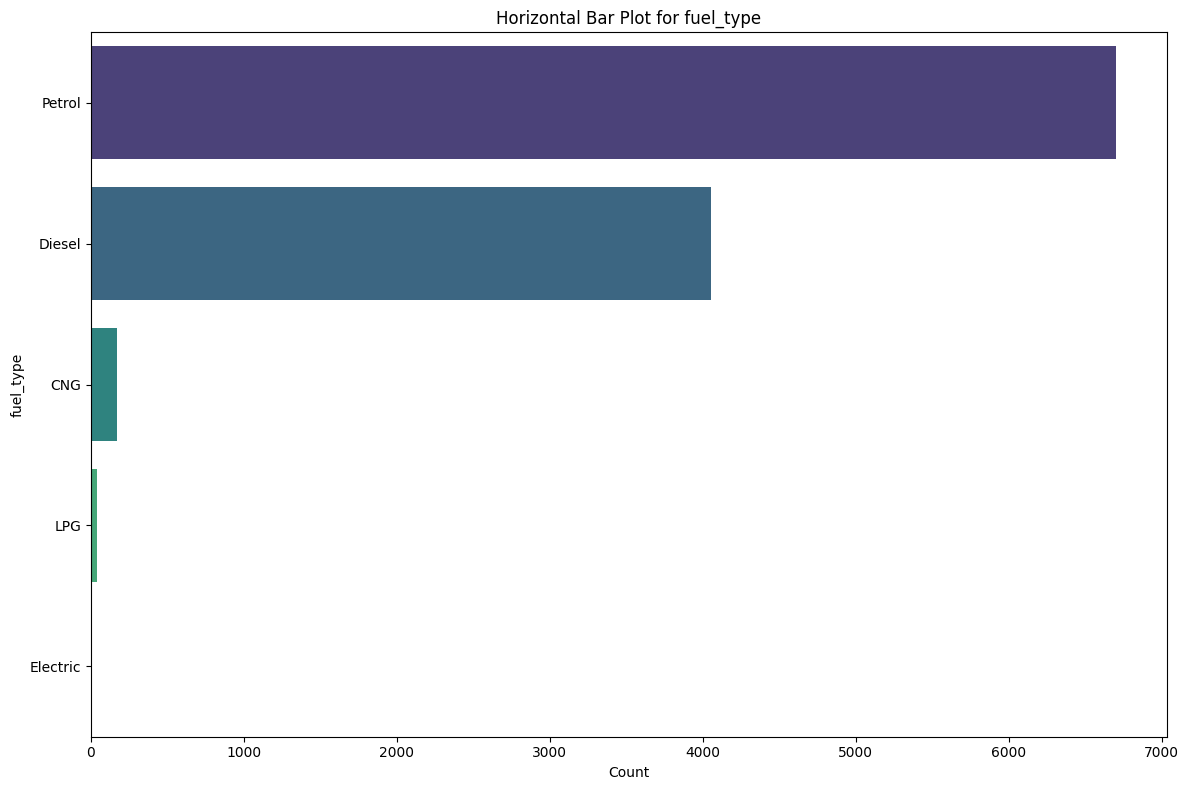

C:\Users\25528815\AppData\Local\Temp\ipykernel_32840\1718557141.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y=column, order=df[column].value_counts().index, palette='viridis')


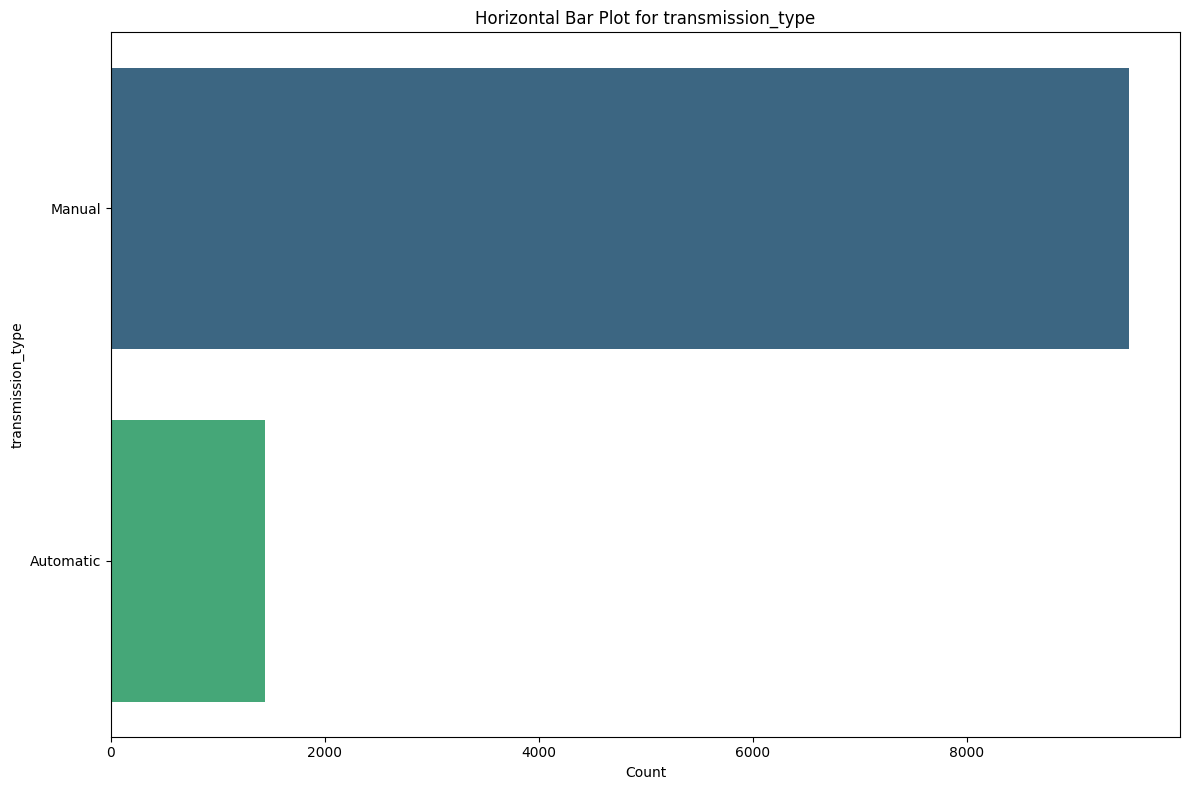

Horizontal bar plots generated for categorical columns excluding ['brand', 'model'].


In [361]:
# Generate Bar Plot - Univariate Analysis of Categorical Columns
print("\n--- Generating Bar Plots for Categorical Columns ---")
# This will create bar plots for each categorical column in the DataFrame to visualize the distribution of categories.
# Define columns to exclude from bar plots
# The columns might need to be adjusted due to thier content for better visualization.
categorical_columns = df.select_dtypes(include='category')
excluded_columns = ['brand', 'model']
for column in categorical_columns:
    if column not in excluded_columns:
       # Horizontal bar plot for better readability
        plt.figure(figsize=(12, 8))
        sns.countplot(data=df, y=column, order=df[column].value_counts().index, palette='viridis')
        plt.title(f"Horizontal Bar Plot for {column}")
        plt.xlabel("Count")
        plt.ylabel(column)
        plt.xticks(rotation=0) #  No rotation for x-axis labels
        plt.tight_layout()
        plt.show()
print(f"Horizontal bar plots generated for categorical columns excluding {excluded_columns}.")

#### 4.5 Encode categorical features

In [362]:
df

,brand,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price,vehicle_age_log,selling_price_log
0,Maruti,Alto,9,120000,Individual,Petrol,Manual,19.70,796,46.30,5,120000,2.397895,11.695255
1,Hyundai,Grand,5,20000,Individual,Petrol,Manual,18.90,1197,82.00,5,550000,1.945910,13.217675
2,Hyundai,i20,11,60000,Individual,Petrol,Manual,17.00,1197,80.00,5,215000,2.564949,12.278398
3,Maruti,Alto,9,37000,Individual,Petrol,Manual,20.92,998,67.10,5,226000,2.397895,12.328295
4,Ford,Ecosport,6,30000,Dealer,Diesel,Manual,22.77,1498,98.59,5,570000,2.079442,13.253393
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15402,Honda,Amaze,6,28000,Dealer,Diesel,Manual,25.80,1498,98.60,5,525000,2.079442,13.171155
15403,Renault,KWID,2,2700,Dealer,Petrol,Manual,25.17,799,53.30,5,395000,1.386294,12.886644
15405,Hyundai,Grand,5,9229,Dealer,Petrol,Manual,18.90,1197,82.00,5,545000,1.945910,13.208543
15406,Hyundai,i10,9,10723,Dealer,Petrol,Manual,19.81,1086,68.05,5,250000,2.397895,12.429220


In [363]:
# Apply label encoding
# from sklearn.preprocessing import LabelEncoder
# label_encoder = LabelEncoder()
# print("Applying label encoding for 'transmission_type'")
# df['transmission_type'] = label_encoder.fit_transform(df['transmission_type'])
# df[['transmission_type']]
# print(label_encoder.classes_)

In [364]:
# Apply label encoding
# print("Applying label encoding for 'seller_type'")
# df['seller_type'] = label_encoder.fit_transform(df['seller_type'])
# df[['seller_type']]
# print(label_encoder.classes_)

In [365]:
# Old Code without pipeline
#  Apply label encoding
# print("Applying label encoding for 'fuel_type'")
# df['fuel_type'] = label_encoder.fit_transform(df['fuel_type'])
# df[['fuel_type']]
# print(label_encoder.classes_)

In [366]:
# # Old Code without pipeline
# Frequency Encoding for high-cardinality categorical variables
# print("--- Frequency Encoding for High Cardinality Categorical")
# for column in ['brand', 'model']:
#    frequency_encode = df[column].value_counts().to_dict()
#    df[column] = df[column].map(frequency_encode)
#    print(df[column])

In [367]:
# Old Code without pipeline
# categorical_columns

In [368]:
# Old Code without pipeline
# df

In [369]:
# # Old Code without pipeline
# df_encoded = pd.get_dummies(df)
# df_encoded.head()

In [370]:
# df_encoded.dtypes

In [371]:
# Old Code without pipeline
# Standardization is a common preprocessing step that scales numerical features to have a mean of 0 and a standard deviation of 1. 
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# scaled_data = scaler.fit_transform(df_encoded[:])   


In [372]:
# # Old Code without pipeline
# scaled_data

In [373]:

# # Old Code without pipeline
# scaled_data.shape

In [374]:
# Old Code without pipeline
# df.shape

In [375]:
# Old Code without pipeline
# scaled_df = pd.DataFrame(scaled_data, columns=df_encoded.columns)
# print(scaled_df)

In [376]:
print(numerical_columns.columns)

Index(['vehicle_age', 'km_driven', 'mileage', 'engine', 'max_power', 'seats',
       'selling_price'],
      dtype='object')


In [377]:
print(categorical_columns.columns)

Index(['brand', 'model', 'seller_type', 'fuel_type', 'transmission_type'], dtype='object')


#### New Code using Pipeline

#### 4.6 Bivariate and Multivariate Analysis: Calculate the correlation matrix for the numerical variable. Generate heatmap for the correlation matrix, and describe the evident relationships.


--- Correlation Matrix ---
                    vehicle_age  km_driven   mileage    engine  max_power  \
vehicle_age           1.000000   0.503000 -0.262998  0.048104  -0.053784   
km_driven             0.503000   1.000000  0.060123  0.232784   0.089970   
mileage              -0.262998   0.060123  1.000000 -0.204358  -0.324050   
engine                0.048104   0.232784 -0.204358  1.000000   0.870035   
max_power            -0.053784   0.089970 -0.324050  0.870035   1.000000   
seats                      NaN        NaN       NaN       NaN        NaN   
selling_price        -0.632066  -0.247222  0.043991  0.488179   0.572878   
vehicle_age_log       0.977986   0.538422 -0.227685  0.071161  -0.035455   
selling_price_log    -0.687821  -0.249539  0.083034  0.492465   0.567039   

                   seats  selling_price  vehicle_age_log  selling_price_log  
vehicle_age          NaN      -0.632066         0.977986          -0.687821  
km_driven            NaN      -0.247222         0.5384

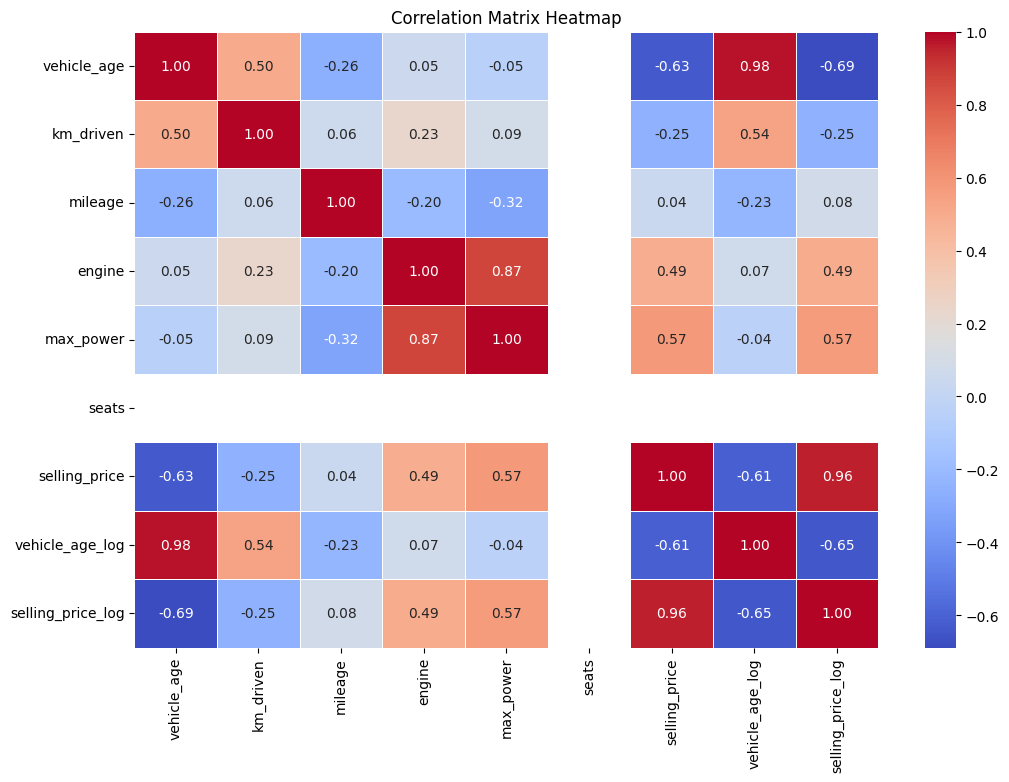

In [378]:
# Calculate the correlation matrix
# Bivariate analysis helps to understand the relationships between pairs of variables.
# Multivariate analysis extends this to multiple variables.
correlation_matrix = df.corr(numeric_only=True)
# Display the correlation matrix    
print("\n--- Correlation Matrix ---\n", correlation_matrix) 
# Generate a heatmap to visualize the correlation matrix
plt.figure(figsize=(12, 8)) 
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

#### 4.7 Provide detailed observations and conclusions.

### Section 5: Feature Selection 

#### 5.1 Use correlation result for feature selection.

In [379]:
#correlation_with_target = df_transformed_scaled.corr()['selling_price']
# correlation_with_target

In [380]:
# selected_features = correlation_with_target.sort_values(ascending=False).head(12).index.tolist()
# selected_features = 
# type(selected_features)
# selected_features

In [381]:
# Get all numerical columns 
# numerical_columns = df_transformed_scaled.columns.tolist()

#feature_to_drop = [column for column in numerical_columns if column not in selected_features and column != 'selling_price']
# feature_to_drop


In [382]:
# df_selected_corr = df_transformed_scaled.drop(feature_to_drop, axis = 1)
# df_selected_corr.head()

In [383]:
# Prepare feature (X) and target (y) variables
print("\n--- Preparing Feature (X) and Target (y) Variables ---")
X = df.drop(columns=['selling_price', 'selling_price_log', 'vehicle_age_log'], axis=1)
y = df['selling_price']


--- Preparing Feature (X) and Target (y) Variables ---


In [384]:
X

,brand,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats
0,Maruti,Alto,9,120000,Individual,Petrol,Manual,19.70,796,46.30,5
1,Hyundai,Grand,5,20000,Individual,Petrol,Manual,18.90,1197,82.00,5
2,Hyundai,i20,11,60000,Individual,Petrol,Manual,17.00,1197,80.00,5
3,Maruti,Alto,9,37000,Individual,Petrol,Manual,20.92,998,67.10,5
4,Ford,Ecosport,6,30000,Dealer,Diesel,Manual,22.77,1498,98.59,5
...,...,...,...,...,...,...,...,...,...,...,...
15402,Honda,Amaze,6,28000,Dealer,Diesel,Manual,25.80,1498,98.60,5
15403,Renault,KWID,2,2700,Dealer,Petrol,Manual,25.17,799,53.30,5
15405,Hyundai,Grand,5,9229,Dealer,Petrol,Manual,18.90,1197,82.00,5
15406,Hyundai,i10,9,10723,Dealer,Petrol,Manual,19.81,1086,68.05,5


In [385]:
for feature in categorical_columns:
    print(feature, ':', X[feature].nunique())

brand : 14
model : 56
seller_type : 3
fuel_type : 4
transmission_type : 2


In [386]:
# Create Column Transformer with 3 types of transformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from category_encoders.binary import BinaryEncoder
from sklearn.compose import ColumnTransformer

numerical_features = X.select_dtypes(exclude='category').columns
onehot_features = ['seller_type', 'fuel_type', 'transmission_type']
binary_features = ['brand', 'model']

numerical_transformer = StandardScaler()
onehot_transformer = OneHotEncoder()
binary_transformer = BinaryEncoder()

preprocessor = ColumnTransformer(
    transformers=[
        ("StandardScaler", numerical_transformer, numerical_features),
        ("OneHotEncoder", onehot_transformer, onehot_features),
        ("BinaryEncoder", binary_transformer, binary_features)
    ],
    remainder='passthrough'
)


In [387]:
X = preprocessor.fit_transform(X)

#### Train Test Split

In [388]:
# separate dataset into train and test
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, f_regression
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape

((8768, 25), (2192, 25))

#### 5.2 Select the features according to the K highest score. 

In [389]:
# `Feature Selection (Select K Best)`
# k = 10
# selector = SelectKBest(score_func=f_regression, k=k)
# X_train = selector.fit_transform(X_train_scaled, y_train)
# X_test_selected = selector.transform(X_test_scaled)

# Get selected features names
# selected_features = X.columns[selector.get_support()]
# print("Top Selected Features:", list(selected_features))

#### 5.3 Provide detailed insights about the selected features.

### Section 6: Model Selection and Training:

#### 6.1 Choose at least three different machine learning algorithms to train on the dataset.

In [390]:
# Import all needed libaries/packages for model training
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.metrics import mean_absolute_error, r2_score, make_scorer, root_mean_squared_error, mean_squared_error
from sklearn.model_selection import cross_val_score
import pandas as pd

# Regression models
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor, AdaBoostRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor




In [391]:
# Create a Function to Evaluate Model
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, mse, rmse, r2_square

In [392]:
# Define Model for each Machine Learning Models - Regression Task
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(),
    "Lasso Regression": Lasso(),
    "Support Vector Regressor": SVR(),
    "KNN Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(),
    "Extra Trees": ExtraTreesRegressor(),
    "Gradient Boost": GradientBoostingRegressor(),
    "XGBoost Regressor": XGBRegressor(),
    "CatBoost Regressor": CatBoostRegressor(),
    "AdaBoost Regressor": AdaBoostRegressor()
}



#### 6.2 Train the models and apply hyperparameter tunning.

In [393]:
# Train the models

# Evaluate models
model_list = []
r2_list = []

for name in range (len(list(models))):
    model = list(models.values())[name]
    model.fit(X_train, y_train) # Start Training

    # Make predictions
    y_train_prediction = model.predict(X_train)
    y_test_prediction = model.predict(X_test)

    # Evaluate Train and Test Dataset
    model_train_mae, model_train_mse, model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_prediction)

    model_test_mae, model_test_mse, model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_prediction)

    print("✅", list(models.keys())[name])
    model_list.append(list(models.keys())[name])
    print("🔹🔹🔹Model Performance for Training Set🔹🔹")
    print("🔹🔹 Root Mean Squared Error:{:.4f}".format(model_train_rmse))
    print("🔹🔹 Mean Squared Error:{:.4f}".format(model_train_mse))
    print("🔹🔹 Mean Absolute Error:{:.4f}".format(model_train_mae))
    print("🔹🔹 R2 Score:{:.4f}".format(model_train_r2))
    
    print("🔹🔹🔹🔹🔹🔹🔹🔹🔹🔹🔹🔹🔹🔹🔹🔹🔹🔹")

    print("🔹🔹🔹Model Performance for Testing Set🔹🔹")
    print("🔹🔹 Root Mean Squared Error:{:.4f}".format(model_test_rmse))
    print("🔹🔹 Mean Squared Error:{:.4f}".format(model_test_mse))
    print("🔹🔹 Mean Absolute Error:{:.4f}".format(model_test_mae))
    print("🔹🔹 R2 Score:{:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)

    print("="*40)
    print("\n")
   


✅ Linear Regression
🔹🔹🔹Model Performance for Training Set🔹🔹
🔹🔹 Root Mean Squared Error:105614.1823
🔹🔹 Mean Squared Error:11154355500.2255
🔹🔹 Mean Absolute Error:82313.6443
🔹🔹 R2 Score:0.7704
🔹🔹🔹🔹🔹🔹🔹🔹🔹🔹🔹🔹🔹🔹🔹🔹🔹🔹
🔹🔹🔹Model Performance for Testing Set🔹🔹
🔹🔹 Root Mean Squared Error:105671.2975
🔹🔹 Mean Squared Error:11166423116.3721
🔹🔹 Mean Absolute Error:81932.8230
🔹🔹 R2 Score:0.7742


✅ Ridge Regression
🔹🔹🔹Model Performance for Training Set🔹🔹
🔹🔹 Root Mean Squared Error:105614.2643
🔹🔹 Mean Squared Error:11154372830.2290
🔹🔹 Mean Absolute Error:82317.9156
🔹🔹 R2 Score:0.7704
🔹🔹🔹🔹🔹🔹🔹🔹🔹🔹🔹🔹🔹🔹🔹🔹🔹🔹
🔹🔹🔹Model Performance for Testing Set🔹🔹
🔹🔹 Root Mean Squared Error:105670.8923
🔹🔹 Mean Squared Error:11166337477.4109
🔹🔹 Mean Absolute Error:81935.3235
🔹🔹 R2 Score:0.7742


✅ Lasso Regression
🔹🔹🔹Model Performance for Training Set🔹🔹
🔹🔹 Root Mean Squared Error:105614.1849
🔹🔹 Mean Squared Error:11154356050.1357
🔹🔹 Mean Absolute Error:82314.4922
🔹🔹 R2 Score:0.7704
🔹🔹🔹🔹🔹🔹🔹🔹🔹🔹🔹🔹🔹🔹🔹🔹🔹🔹
🔹🔹🔹Model Performance for Tes

In [394]:
# Store the Results of All Models
pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model Name', 'R2_Score']).sort_values(by=["R2_Score"], ascending=False)

,Model Name,R2_Score
10,CatBoost Regressor,0.899455
9,XGBoost Regressor,0.890835
6,Random Forest,0.886214
8,Gradient Boost,0.882754
4,KNN Regressor,0.871236
7,Extra Trees,0.863315
5,Decision Tree,0.814723
11,AdaBoost Regressor,0.802207
1,Ridge Regression,0.774173
2,Lasso Regression,0.774171


In [395]:
results_df = pd.DataFrame(
    list(zip(model_list, r2_list)),
    columns=['Model Name', 'R2_Score']
).sort_values(by=["R2_Score"], ascending=False)
print(results_df)

                  Model Name  R2_Score
10        CatBoost Regressor  0.899455
9          XGBoost Regressor  0.890835
6              Random Forest  0.886214
8             Gradient Boost  0.882754
4              KNN Regressor  0.871236
7                Extra Trees  0.863315
5              Decision Tree  0.814723
11        AdaBoost Regressor  0.802207
1           Ridge Regression  0.774173
2           Lasso Regression  0.774171
0          Linear Regression  0.774171
3   Support Vector Regressor -0.012420


C:\Users\25528815\AppData\Local\Temp\ipykernel_32840\2308009740.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=results_df, x="Model Name", y="R2_Score", palette="viridis")


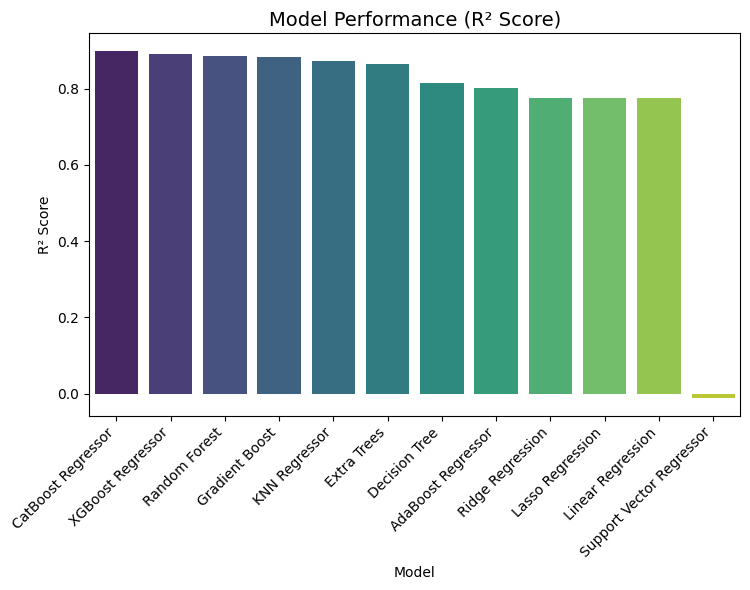

In [396]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


# 📊 Plot Model Performance: R² Score, MAE, and RMSE
plt.figure(figsize=(21, 6))

# R² Score Plot
plt.subplot(1, 3, 1)
sns.barplot(data=results_df, x="Model Name", y="R2_Score", palette="viridis")
plt.xticks(rotation=45, ha="right")
plt.title("Model Performance (R² Score)", fontsize=14)
plt.ylabel("R² Score")
plt.xlabel("Model")



plt.tight_layout()
plt.show()


C:\Users\25528815\AppData\Local\Temp\ipykernel_32840\789762265.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


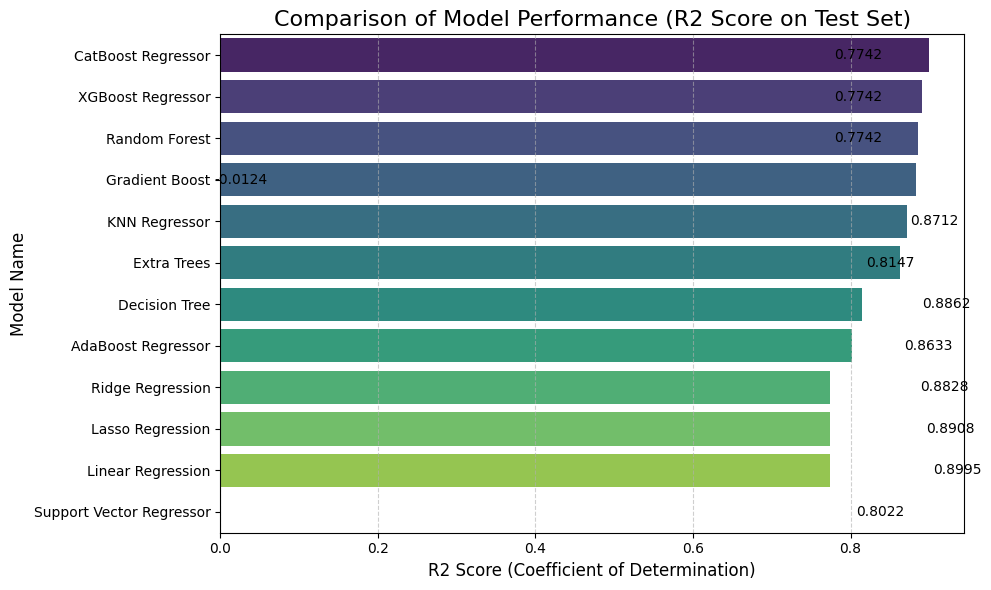

In [397]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Create the Results DataFrame (As requested in previous steps)
results_df = pd.DataFrame(
    list(zip(model_list, r2_list)),
    columns=['Model Name', 'R2_Score']
).sort_values(by=["R2_Score"], ascending=False)

# 2. Plot the Results
plt.figure(figsize=(10, 6))

# Use seaborn for a clear, professional-looking bar plot
sns.barplot(
    x='R2_Score',
    y='Model Name',
    data=results_df,
    palette='viridis' # You can choose any color palette
)

# Add titles and labels
plt.title('Comparison of Model Performance (R2 Score on Test Set)', fontsize=16)
plt.xlabel('R2 Score (Coefficient of Determination)', fontsize=12)
plt.ylabel('Model Name', fontsize=12)
plt.xlim(0, results_df['R2_Score'].max() * 1.05) # Adjust x-axis limit for spacing

# Add the R2 score values as text on the bars for clarity
for index, row in results_df.iterrows():
    plt.text(
        row['R2_Score'] + 0.005,  # x position with a slight offset
        index,                  # y position (index of the bar)
        f"{row['R2_Score']:.4f}",  # The text to display
        color='black',
        ha="left",               # Horizontal alignment
        va="center"              # Vertical alignment
    )

plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

In [398]:
# We will use the top 5, accept for Decision. Preferable to use Ensemble Methods which build on top of Decision Tree
#  to overcome its drawback for Hyper Parameter Tuning.
# Decision perfect performance on training set but not on the testing set- possible severe overfitting
# Leave Extra Tree, also perfect performance but not on training set not on the testing set- possible severe overfitting
randomforest_params = {"max_depth": [10, 20, 30, None],
                        "max_features": ['sqrt', 'log2', 0.5, 0.8],
                        "min_samples_split": [2, 5, 10],
                        "min_samples_leaf": [1, 3, 5, 10], # New and important
                        "n_estimators": [200, 500, 1000]}

gradientboost_params = {"n_estimators": [100, 500, 1000, 1500],
                            "learning_rate": [0.01, 0.05, 0.1, 0.2],
                            "max_depth": [3, 5, 7],
                            "subsample": [0.7, 0.8, 0.9, 1.0], # Stochastic GBM
                            "max_features": ['sqrt', 0.8, None]}


catboost_params = {"learning_rate": [0.01, 0.03, 0.07, 0.1],
                    "max_depth": [4, 6, 8, 10, 12],
                    "l2_leaf_reg": [1, 3, 5, 10]} # L2 Regularization


xgboost_params = {"learning_rate": [0.01, 0.05, 0.1, 0.2],
                  "max_depth": [3, 5, 7, 10, 15],
                  "n_estimators": [200, 500, 1000],
                  "colsample_bytree": [0.5, 0.7, 0.9, 1.0],
                  "subsample": [0.7, 0.9, 1.0], # Row subsampling
                  "gamma": [0, 0.1, 0.5, 1, 5]} # Min Loss Reduction


from sklearn.tree import DecisionTreeRegressor

adaboost_model = AdaBoostRegressor(estimator=DecisionTreeRegressor(), random_state=42)

adaboost_params = {"n_estimators": [50, 100, 300, 500],
                            "learning_rate": [0.01, 0.1, 0.5, 1.0],
                            "loss": ['linear', 'square', 'exponential'], # Added exponential
                            "estimator__max_depth": [1, 2, 3], # Crucial for weak learners
                            "estimator__min_samples_split": [2, 5]}                          
print("Hyper Parameters Initialised......")

Hyper Parameters Initialised......


In [399]:
# Initialise few parameter for hyperparameter tuning


In [400]:
# Model list for Hyperparameter tuning
randomcv_models = [("Random Forest", RandomForestRegressor(), randomforest_params),
                    ("Gradient Boost", GradientBoostingRegressor(), gradientboost_params),
                    ("CatBoost Regressor", CatBoostRegressor(verbose=False), catboost_params),
                    ("XGBoost Regressor", XGBRegressor(), xgboost_params),
                    ("AdaBoost Regressor", adaboost_model, adaboost_params)
                    ]

In [401]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

# === 🔧 Models & hyperparameters ===
model_param = {}
for name, model, params in randomcv_models:
  random = RandomizedSearchCV(estimator=model, param_distributions=params, n_iter=15, cv=3, verbose=2, n_jobs=-1, random_state=42)
  random.fit(X_train, y_train)
  model_param[name] = random.best_params_

for model_name in model_param:
    print(f"🔹🔹🔹🔹🔹🔹🔹 Best Parameters for {model_name} 🔹🔹🔹🔹🔹🔹🔹")
    print(model_param[model_name])



Fitting 3 folds for each of 15 candidates, totalling 45 fits
Fitting 3 folds for each of 15 candidates, totalling 45 fits
Fitting 3 folds for each of 15 candidates, totalling 45 fits
Fitting 3 folds for each of 15 candidates, totalling 45 fits
Fitting 3 folds for each of 15 candidates, totalling 45 fits
🔹🔹🔹🔹🔹🔹🔹 Best Parameters for Random Forest 🔹🔹🔹🔹🔹🔹🔹
{'n_estimators': 200, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_features': 0.8, 'max_depth': 30}
🔹🔹🔹🔹🔹🔹🔹 Best Parameters for Gradient Boost 🔹🔹🔹🔹🔹🔹🔹
{'subsample': 0.9, 'n_estimators': 500, 'max_features': 0.8, 'max_depth': 7, 'learning_rate': 0.01}
🔹🔹🔹🔹🔹🔹🔹 Best Parameters for CatBoost Regressor 🔹🔹🔹🔹🔹🔹🔹
{'max_depth': 4, 'learning_rate': 0.1, 'l2_leaf_reg': 3}
🔹🔹🔹🔹🔹🔹🔹 Best Parameters for XGBoost Regressor 🔹🔹🔹🔹🔹🔹🔹
{'subsample': 1.0, 'n_estimators': 500, 'max_depth': 3, 'learning_rate': 0.2, 'gamma': 5, 'colsample_bytree': 0.5}
🔹🔹🔹🔹🔹🔹🔹 Best Parameters for AdaBoost Regressor 🔹🔹🔹🔹🔹🔹🔹
{'n_estimators': 300, 'loss': 'square', 'learning_

In [ ]:
from sklearn.tree import DecisionTreeRegressor
# Retraining the model with best parameters
# Handle AdaBoost specially
adaboost_params = model_param['AdaBoost Regressor']
tree_params = {k.replace("estimator__", ""): v for k, v in adaboost_params.items() if k.startswith("estimator__")}
boost_params = {k: v for k, v in adaboost_params.items() if not k.startswith("estimator__")}
models = {
    "Random Forest": RandomForestRegressor(**model_param['Random Forest'], n_jobs=-1),
    "Gradient Boost": GradientBoostingRegressor(**model_param['Gradient Boost']),
    "XGBoost Regressor": XGBRegressor(**model_param['XGBoost Regressor'], n_jobs=-1),
    "CatBoost Regressor": CatBoostRegressor(**model_param['CatBoost Regressor'], verbose=False),
    "AdaBoost Regressor": AdaBoostRegressor(estimator=DecisionTreeRegressor(**tree_params),**boost_params)
}

# Train the models

# Evaluate models
model_list = []
r2_list = []

for name in range (len(list(models))):
    model = list(models.values())[name]
    model.fit(X_train, y_train) # Start Training

    # Make predictions
    y_train_prediction = model.predict(X_train)
    y_test_prediction = model.predict(X_test)

    # Evaluate Train and Test Dataset
    model_train_mae, model_train_mse, model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_prediction)

    model_test_mae, model_test_mse, model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_prediction)

    print("✅", list(models.keys())[name])
    model_list.append(list(models.keys())[name])
    print("🔹🔹🔹Model Performance for Training Set🔹🔹")
    print("🔹🔹 Root Mean Squared Error:{:.8f}".format(model_train_rmse))
    print("🔹🔹 Mean Squared Error:{:.8f}".format(model_train_mse))
    print("🔹🔹 Mean Absolute Error:{:.8f}".format(model_train_mae))
    print("🔹🔹 R2 Score:{:.8f}".format(model_train_r2))
    
    print("🔹🔹🔹🔹🔹🔹🔹🔹🔹🔹🔹🔹🔹🔹🔹🔹🔹🔹")

    print("🔹🔹🔹Model Performance for Testing Set🔹🔹")
    print("🔹🔹 Root Mean Squared Error:{:.8f}".format(model_test_rmse))
    print("🔹🔹 Mean Squared Error:{:.8f}".format(model_test_mse))
    print("🔹🔹 Mean Absolute Error:{:.8f}".format(model_test_mae))
    print("🔹🔹 R2 Score:{:.8f}".format(model_test_r2))
    r2_list.append(model_test_r2)

    print("="*45)
    print("\n")
   

✅ Random Forest
🔹🔹🔹Model Performance for Training Set🔹🔹
🔹🔹 Root Mean Squared Error:51100.90613140
🔹🔹 Mean Squared Error:2611302607.45049477
🔹🔹 Mean Absolute Error:39083.05302903
🔹🔹 R2 Score:0.94624071
🔹🔹🔹🔹🔹🔹🔹🔹🔹🔹🔹🔹🔹🔹🔹🔹🔹🔹
🔹🔹🔹Model Performance for Testing Set🔹🔹
🔹🔹 Root Mean Squared Error:71503.00720263
🔹🔹 Mean Squared Error:5112680039.01926708
🔹🔹 Mean Absolute Error:53649.54368113
🔹🔹 R2 Score:0.89660155


✅ Gradient Boost
🔹🔹🔹Model Performance for Training Set🔹🔹
🔹🔹 Root Mean Squared Error:59295.49502202
🔹🔹 Mean Squared Error:3515955729.90612984
🔹🔹 Mean Absolute Error:45874.34817805
🔹🔹 R2 Score:0.92761647
🔹🔹🔹🔹🔹🔹🔹🔹🔹🔹🔹🔹🔹🔹🔹🔹🔹🔹
🔹🔹🔹Model Performance for Testing Set🔹🔹
🔹🔹 Root Mean Squared Error:70159.19620163
🔹🔹 Mean Squared Error:4922312811.65867901
🔹🔹 Mean Absolute Error:52877.19748896
🔹🔹 R2 Score:0.90045152


✅ XGBoost Regressor
🔹🔹🔹Model Performance for Training Set🔹🔹
🔹🔹 Root Mean Squared Error:63347.53614783
🔹🔹 Mean Squared Error:4012910336.00000000
🔹🔹 Mean Absolute Error:48722.28515625
🔹🔹 R2

In [403]:
# Store the Results of All Models
pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model Name', 'R2_Score']).sort_values(by=["R2_Score"], ascending=False)

,Model Name,R2_Score
1,Gradient Boost,0.900452
3,CatBoost Regressor,0.897740
0,Random Forest,0.896602
2,XGBoost Regressor,0.895500
4,AdaBoost Regressor,0.796349


In [404]:
results_df = pd.DataFrame(
    list(zip(model_list, r2_list)),
    columns=['Model Name', 'R2_Score']
).sort_values(by=["R2_Score"], ascending=False)
print(results_df)

           Model Name  R2_Score
1      Gradient Boost  0.900452
3  CatBoost Regressor  0.897740
0       Random Forest  0.896602
2   XGBoost Regressor  0.895500
4  AdaBoost Regressor  0.796349


In [405]:
df_results = pd.DataFrame({
    "Actual": y_test,
    "Predicted": y_test_prediction 
})
print(df_results)

        Actual      Predicted
6986    450000  539398.900667
6615    785000  773601.099153
13199   300000  261051.020408
9150    850000  836278.846154
14658   725000  619423.628275
...        ...            ...
6110    635000  618437.288136
1903   1055000  869520.275440
4238    552000  564080.824840
8271    500000  535841.124260
14972   793000  623008.438819

[2192 rows x 2 columns]


In [406]:
best_index = np.argmax(r2_list)
best_model_name = model_list[best_index]
best_model = list(models.values())[best_index]

print(f"🏆 Best Model: {best_model_name} with R² = {r2_list[best_index]:.8f}")

🏆 Best Model: Gradient Boost with R² = 0.90045152


In [407]:
# Select your absolute best performing model after tuning
best_model_name = "Gradient Boost"
best_model = models[best_model_name]


In [408]:
# Define the Preprocessing ColumnTransformer
# Using Earlier Code
# Create the Final Pipeline
final_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('selector', SelectKBest(score_func=f_regression, k='all')),
    ('regressor', best_model)
])

In [ ]:
# Train the full pipeline on original X and y data
X_before_transform = df.drop(columns=['selling_price', 'selling_price_log', 'vehicle_age_log'], axis=1)
y_before_transform = df['selling_price']

# Split the untranformed data
X_train_final, X_test_final, y_train_final, y_test_final = train_test_split(
    X_before_transform, y_before_transform, test_size=0.2, random_state=42)

# Fit the full pipeline on the original training data
print(f"Fitting the final pipeline with {best_model_name}🔹🔹🔹🔹🔹")
final_pipeline.fit(X_train_final, y_train_final)
print("Pipeline fit complete.")

# Check performance on test data
final_pipeline_prediction = final_pipeline.predict(X_test_final)
mae, mse, rmse, r2 = evaluate_model(y_test_final, final_pipeline_prediction)
print(f"\nFinal Pipeline Test R2 Score: {r2:4f}")

Fitting the final pipeline with Gradient Boost🔹🔹🔹🔹🔹
Pipeline fit complete.

Final Pipeline Test R2 Score: 0.898344


In [410]:
# Saving the Pipeline and Feature Properties

In [411]:
import joblib

# Save the entire pipeline
deployment_filename = f"car_price_{best_model_name.replace(' ', '_')}_pipeline.pkl"
joblib.dump(final_pipeline, deployment_filename)

print(f"✅ Full deployment pipeline saved succesfully as: **{deployment_filename}**")
print("Final Pipeline", final_pipeline)
original_feature_columns = X_before_transform.columns.tolist()

# Save the original features names from untransform X DataFrame
joblib.dump(original_feature_columns, 'original_feature_columns.pkl')
print(f"✅ Saved  Original Feature as: **original_feature_columns.pkl**")
print("Original Features:", original_feature_columns)



✅ Full deployment pipeline saved succesfully as: **car_price_Gradient_Boost_pipeline.pkl**
Final Pipeline Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('StandardScaler',
                                                  StandardScaler(),
                                                  Index(['vehicle_age', 'km_driven', 'mileage', 'engine', 'max_power', 'seats'], dtype='object')),
                                                 ('OneHotEncoder',
                                                  OneHotEncoder(),
                                                  ['seller_type', 'fuel_type',
                                                   'transmission_type']),
                                                 ('BinaryEncoder',
                                                  BinaryEncoder(),
                                                  ['brand', 'model'])])),
                ('selec

#### 6.3 Provide detailed observations and conclusions.

### Section 7: Model Evaluation:

In [412]:
# Random Forest, Extra Trees, Gradient Boosting, and XGBoost are all very close to 1.0
# Meaning they explain almost all variance in the target variable.
# SVR and KNN are also strong but slightly lower.
# Linear, Ridge, and Lasso regressions have lower R², though still decent.


✅ Top performers by R² Score:

🥇 Random Forest

🥈 Extra Trees

🥉 Gradient Boosting (or XGBoost — almost tied)

In [413]:
# Random Forest, Extra Trees, Gradient Boosting, and XGBoost show extremely low MAE (near zero), meaning their predictions are very accurate.

# SVR and KNN have slightly higher error but still quite low.

# Linear, Ridge, and Lasso regressions have visibly higher MAE — especially Lasso, which performs the worst.

✅ Top performers by MAE (Lowest Error):

🥇 Random Forest

🥈 Extra Trees

🥉 Gradient Boosting / XGBoost (nearly identical)

🏆 Final Top 3 Models
Considering both R² and MAE together: Random Forest, Extra Tree, and Gradient Boosting or XGBoost for this task. We will test further to confirm the scores.

#### 7.1 Evaluate the performance of each model using appropriate metrics (e.g., accuracy, precision, recall, F1-score for classification; RMSE, MAE, R square for regression).

#### 7.2 Compare the performance of the models and select the best model based on the evaluation metrics.

#### 7.3 Provide detailed comparison and analysis of the models’ performance.

#### The End of Model Development




### Section 8: Model Deployment with web app:

#### 8.1: Develop an interactive web application using Streamlit.

#### 8.2 Integrate the best-performing machine learning model into the Streamlit app.

#### 8.3 Provide an interface for users to input new data and obtain predictions from the model.